# Load packages and climate predictions

In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import xarray as xr
import spotpy
from matplotlib.offsetbox import AnchoredText
from scipy import stats, signal, optimize
import hydroeval as he
sns.set(style='whitegrid', palette='deep')
import plotly.express as px
import plotly.io as pio
pio.renderers.default='iframe'

In [2]:
climate = xr.load_dataset('../data/cordex_coast.nc')
# load primary data
#data = xr.load_dataset('./data/hydro_krummh.nc').to_dataframe()
#data.head()

In [3]:
# evaluate only winter season
climate =climate.sel(time=climate['time.season']=='DJF')
climate

<xarray.Dataset>
Dimensions:                                          (time: 8573, vars: 14)
Coordinates:
  * time                                             (time) datetime64[ns] 20...
  * vars                                             (vars) object 'T' ... 'E...
Data variables:
    CLMcom.CERFACS-CNRM-CM5.CCLM4-8-17.r1i1p1.rcp45  (time, vars) float64 1.4...
    CLMcom.CERFACS-CNRM-CM5.CCLM4-8-17.r1i1p1.rcp85  (time, vars) float64 1.4...
    CLMcom.EC-EARTH.CCLM4-8-17.r12i1p1.rcp26         (time, vars) float64 2.0...
    CLMcom.EC-EARTH.CCLM4-8-17.r12i1p1.rcp45         (time, vars) float64 2.0...
    CLMcom.EC-EARTH.CCLM4-8-17.r12i1p1.rcp85         (time, vars) float64 2.0...
    CLMcom.MIROC5.CCLM4-8-17.r1i1p1.rcp26            (time, vars) float64 -5....
    CLMcom.HadGEM2-ES.CCLM4-8-17.r1i1p1.rcp45        (time, vars) float64 12....
    CLMcom.M-MPI-ESM-LR.CCLM4-8-17.r1i1p1.rcp45      (time, vars) float64 -0....
    CLMcom.M-MPI-ESM-LR.CCLM4-8-17.r1i1p1.rcp85      (time, vars) float64 -0....
    DMI.CERFACS-CNRM-CM5.HIRHAM5.r1i1p1.rcp85        (time, vars) float64 4.7...
    DMI.EC-EARTH.HIRHAM5.r3i1p1.rcp26                (time, vars) float64 2.4...
    DMI.EC-EARTH.HIRHAM5.r3i1p1.rcp45                (time, vars) float64 2.4...
    DMI.EC-EARTH.HIRHAM5.r12i1p1.rcp85               (time, vars) float64 3.0...
    DMI.EC-EARTH.HIRHAM5.r1i1p1.rcp85                (time, vars) float64 5.2...
    DMI.EC-EARTH.HIRHAM5.r3i1p1.rcp85                (time, vars) float64 2.4...
    DMI.HadGEM2-ES.HIRHAM5.r1i1p1.rcp85              (time, vars) float64 6.2...
    DMI.NorESM1-M.HIRHAM5.r1i1p1.rcp45               (time, vars) float64 6.2...
    DMI.NorESM1-M.HIRHAM5.r1i1p1.rcp85               (time, vars) float64 6.6...
    GERICS.EC-EARTH.REMO2015.r12i1p1.rcp26           (time, vars) float64 2.9...
    GERICS.IPSL-CM5A-LR.REMO2015.r1i1p1.rcp26        (time, vars) float64 0.7...
    GERICS.MIROC5.REMO2015.r1i1p1.rcp26              (time, vars) float64 -0....
    GERICS.HadGEM2-ES.REMO2015.r1i1p1.rcp26          (time, vars) float64 7.9...
    GERICS.NorESM1-M.REMO2015.r1i1p1.rcp26           (time, vars) float64 2.7...
    GERICS.NorESM1-M.REMO2015.r1i1p1.rcp85           (time, vars) float64 2.7...
    GERICS.GFDL-GFDL-ESM2G.REMO2015.r1i1p1.rcp26     (time, vars) float64 4.3...
    KNMI.CERFACS-CNRM-CM5.RACMO22E.r1i1p1.rcp26      (time, vars) float64 2.5...
    KNMI.CERFACS-CNRM-CM5.RACMO22E.r1i1p1.rcp45      (time, vars) float64 2.5...
    KNMI.CERFACS-CNRM-CM5.RACMO22E.r1i1p1.rcp85      (time, vars) float64 2.5...
    KNMI.EC-EARTH.RACMO22E.r12i1p1.rcp26             (time, vars) float64 -0....
    KNMI.EC-EARTH.RACMO22E.r12i1p1.rcp45             (time, vars) float64 -0....
    KNMI.EC-EARTH.RACMO22E.r1i1p1.rcp45              (time, vars) float64 2.5...
    KNMI.EC-EARTH.RACMO22E.r12i1p1.rcp85             (time, vars) float64 -0....
    KNMI.EC-EARTH.RACMO22E.r1i1p1.rcp85              (time, vars) float64 2.5...
    KNMI.EC-EARTH.RACMO22E.r3i1p1.rcp85              (time, vars) float64 0.8...
    KNMI.HadGEM2-ES.RACMO22E.r1i1p1.rcp26            (time, vars) float64 5.7...
    KNMI.HadGEM2-ES.RACMO22E.r1i1p1.rcp45            (time, vars) float64 11....
    KNMI.HadGEM2-ES.RACMO22E.r1i1p1.rcp85            (time, vars) float64 9.8...
    KNMI.M-MPI-ESM-LR.RACMO22E.r1i1p1.rcp85          (time, vars) float64 0.7...
    KNMI.NorESM1-M.RACMO22E.r1i1p1.rcp85             (time, vars) float64 4.6...
    MPI-CSC.M-MPI-ESM-LR.REMO2009.r1i1p1.rcp26       (time, vars) float64 -1....
    MPI-CSC.M-MPI-ESM-LR.REMO2009.r2i1p1.rcp26       (time, vars) float64 5.8...
    MPI-CSC.M-MPI-ESM-LR.REMO2009.r1i1p1.rcp45       (time, vars) float64 -1....
    MPI-CSC.M-MPI-ESM-LR.REMO2009.r2i1p1.rcp45       (time, vars) float64 5.8...
    MPI-CSC.M-MPI-ESM-LR.REMO2009.r1i1p1.rcp85       (time, vars) float64 -1....
    MPI-CSC.M-MPI-ESM-LR.REMO2009.r2i1p1.rcp85       (time, vars) float64 5.8...
    UHOH.M-MPI-ESM-LR.WRF361H.r1i1p1.rcp85           (time, vars) float

# Evaluate the 5 yearly 95% quantile as intensity of an extreme event

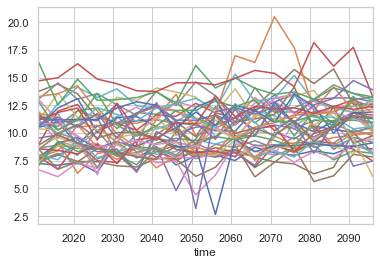

In [4]:
df = climate.sel(vars='Prec').to_dataframe().iloc[:,1:] # select precipiation data from climate data set
df_absoluteP = (df).resample('5Y').quantile(0.95)[1:-1]  # get the 5 yearly 95% quantile
df_absoluteP.plot(legend = False)


In [5]:
# get the 95% quantile of all predictions in the particular RCP for all predictions (upper end of the predicted rainfall events)
data = pd.DataFrame()
data['RCP8.5, n = '+str(df_absoluteP.filter(regex=r'rcp85').shape[1])] = df_absoluteP.filter(regex=r'rcp85').quantile(0.95, axis=1)# /shape(df_extremeP.filter(regex=r'rcp85'))[1]
data['RCP4.5, n = '+str(df_absoluteP.filter(regex=r'rcp45').shape[1])] = df_absoluteP.filter(regex=r'rcp45').quantile(0.95, axis=1)# /shape(df_extremeP.filter(regex=r'rcp45'))[1]
data['RCP2.6, n = '+str(df_absoluteP.filter(regex=r'rcp26').shape[1])] = df_absoluteP.filter(regex=r'rcp26').quantile(0.95, axis=1)# /shape(df_extremeP.filter(regex=r'rcp26'))[1]

px.line(data, title = 'Absolute change in precipitation of 5yearly 95% quantile')

In [6]:
# normalize absolute values to relative values in comparison to mean values at start of the century
df_extremeP = df_absoluteP
for z in df_extremeP.columns:
    df_extremeP[z] = df_extremeP[z] / (df_extremeP.loc[:"2030",z]).mean()
    
data = pd.DataFrame()
data['RCP8.5, upper 95%, n = '+str(df_extremeP.filter(regex=r'rcp85').shape[1])] = df_extremeP.filter(regex=r'rcp85').quantile(0.95, axis=1)# /shape(df_extremeP.filter(regex=r'rcp85'))[1]
data['RCP4.5, upper 95%, n = '+str(df_extremeP.filter(regex=r'rcp45').shape[1])] = df_extremeP.filter(regex=r'rcp45').quantile(0.95, axis=1)# /shape(df_extremeP.filter(regex=r'rcp45'))[1]
data['RCP2.6, upper 95%, n = '+str(df_extremeP.filter(regex=r'rcp26').shape[1])] = df_extremeP.filter(regex=r'rcp26').quantile(0.95, axis=1)# /shape(df_extremeP.filter(regex=r'rcp26'))[1]
data['RCP8.5, lower 5%, n = '+str(df_extremeP.filter(regex=r'rcp85').shape[1])] = df_extremeP.filter(regex=r'rcp85').quantile(0.05, axis=1)# /shape(df_extremeP.filter(regex=r'rcp85'))[1]
data['RCP4.5, lower 5% n = '+str(df_extremeP.filter(regex=r'rcp45').shape[1])] = df_extremeP.filter(regex=r'rcp45').quantile(0.05, axis=1)# /shape(df_extremeP.filter(regex=r'rcp45'))[1]
data['RCP2.6, lower 5% n = '+str(df_extremeP.filter(regex=r'rcp26').shape[1])] = df_extremeP.filter(regex=r'rcp26').quantile(0.05, axis=1)# /shape(df_extremeP.filter(regex=r'rcp26'))[1]

px.line(data, title = 'Relative change in precipitation at 5% and 95% quantile (5yearly)')

In [7]:
print('RCP2.6')
print(df_extremeP.filter(regex=r'rcp26')['2090':'2100'].quantile(0.95).quantile(0.95))
print(df_extremeP.filter(regex=r'rcp26')['2090':'2100'].quantile(0.05).quantile(0.5))

print(df_extremeP.filter(regex=r'rcp26')['2090':'2100'].quantile(0.05).quantile(0.05))

print('RCP4.5')
print(df_extremeP.filter(regex=r'rcp45')['2090':'2100'].quantile(0.95).quantile(0.95))
print(df_extremeP.filter(regex=r'rcp45')['2090':'2100'].quantile(0.05).quantile(0.5))

print(df_extremeP.filter(regex=r'rcp45')['2090':'2100'].quantile(0.05).quantile(0.05))

print('RCP8.5')
print(df_extremeP.filter(regex=r'rcp85')['2090':'2100'].quantile(0.95).quantile(0.95))
print(df_extremeP.filter(regex=r'rcp85')['2090':'2100'].quantile(0.05).quantile(0.5))

print(df_extremeP.filter(regex=r'rcp85')['2090':'2100'].quantile(0.05).quantile(0.05))


px.line(df_extremeP.filter(regex=r'rcp45'))

RCP2.6
1.1890430878223501
0.9693754958366487
0.7709046742406042
RCP4.5
1.282516522017795
0.9955737697096958
0.9054213120996688
RCP8.5
1.3766574635025326
1.1359350742634209
0.8710194481937185
